In [1]:
import matplotlib.pyplot as plt
import numpy as np

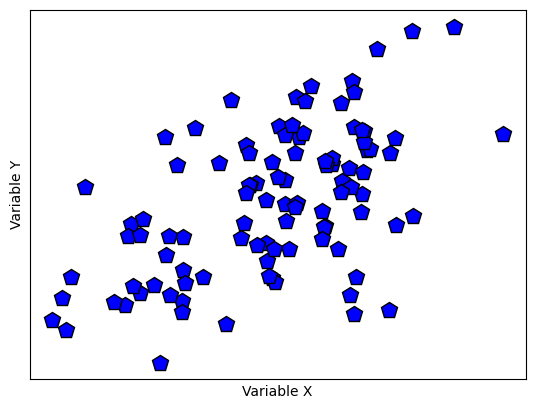

In [3]:
## simulate data

# data simulation parameters
N = 100
r = .6 # desired correlation coefficient

# start with random numbers
x = np.random.randn(N)
y = np.random.randn(N)

# impose the correlation on y
# 원하는 상관계수에 맞는 y값 데이터로 변경
y = x*r + y*np.sqrt(1-r**2)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# compute the empirical correlation
# 목표로한 r 값과 경험적 r값이 차이 나는 이유는 여기서의 r은 일종의 이론적 상관계수이기 때문
# 경험적 r값은 현재 난수에서 추출하므로 차이가 날 수 있음. 데이터가 무한하다면 r값과 경험적r 값이 일치할것이다.

empR = np.corrcoef(x,y)
print('Desired r=%g, empirical r=%g'%(r,empR[0,1]))

Desired r=0.6, empirical r=0.550648


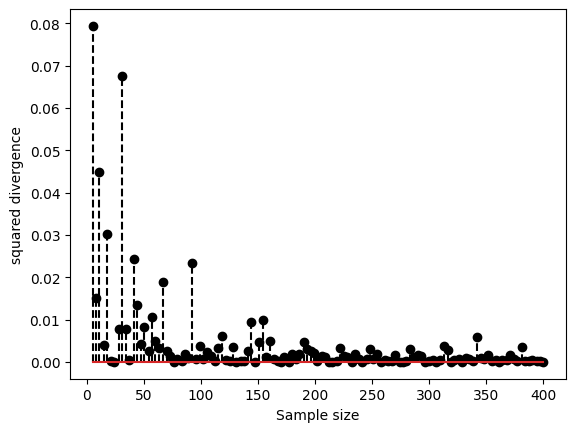

In [13]:
## Test the errors as a function of N
# 여기서 오류는 우리 지정한 상관계수와 랜덤 데이터에 얻은 상관계수간의 차이를 의미

# range of sample sizes
Ns = np.round(np.linspace(5,400,123)).astype(int)

# theoretical correlation coefficient (fixed)
r = .6

# initialize
corrs =np.zeros(len(Ns))

# run the experiment!
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y= x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    # 현재는 실제 상관계수가 아닌 실제 상관계수와 이론적 상관계수의 차(오류)를 구하고자 함
    # 오류값을 제곱하는 이유는 두가지다.
    # 하나는 제곱 오 항이 통계에 흔히 사용된다는 점 - ANOVA, GLM, 회귀분석 등
    # 음수 부호를 없애기 위해
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2

plt.stem(Ns,corrs,'ko--')
plt.xlabel('Sample size')
plt.ylabel('squared divergence')
plt.show()